# Analysis & Visualizations

Analysis

In [2]:
%matplotlib inline

In [426]:
#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats 
import numpy as np
from scipy.stats import linregress
import gmaps
import requests

from gkey import gkey

In [227]:
#data files
csv_food_atlas_path = "clean_food_atlas_access - clean_food_atlas_access.csv"
csv_grocery_store_path = "clean_grocery.csv"
csv_pov_tract = "PovertyLevel.csv"

#read the data and the study results for CSV 
food = pd.read_csv(csv_food_atlas_path)
grocery = pd.read_csv(csv_grocery_store_path)
poverty = pd.read_csv(csv_pov_tract)


grocery.head()

,STORE NAME,SQUARE FEET,BUFFER SIZE,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,CENSUS TRACT,LATITUDE,LONGITUDE,LOCATION
0,BOB'S LIQUORS & GROCERIES,10001.0,A,60644,AUSTIN,25,17031252201,41.880296,-87.752494,"(41.8802960895, -87.7524941982)"
1,QUICK STOP FOOD MART,3000.0,B,60645,WEST RIDGE,2,17031020601,42.004750,-87.699423,"(42.0047500731, -87.6994227766)"
2,DOMINICK'S #147/1147,68000.0,A,60607,NEAR WEST SIDE,28,17031841900,41.864521,-87.639304,"(41.8645211937, -87.6393040996)"
3,CERMAK PRODUCE,25000.0,A,60632,WEST ELSDON,62,17031620200,41.797992,-87.723444,"(41.79799187, -87.7234437408)"
4,WHOLE FOODS MARKET,4501.0,B,60657,LAKE VIEW,6,17031062500,41.941566,-87.668860,"(41.9415658578, -87.6688604029)"


In [228]:
poverty.head()

,CENSUS TRACT,Total At/Above poverty level,Total Below poverty level,At/Above poverty level receiving benefits,At/Above not receiving benefits,Below poverty level receiving,Below Poverty Level not receiving
0,17031010100,1567,749,112,1455,321,428
1,17031010201,1979,709,323,1656,528,181
2,17031010202,889,213,147,742,85,128
3,17031010300,2571,466,265,2306,205,261
4,17031010400,1518,420,155,1363,122,298


In [138]:
food.head()

,FIPS,State,County,"Population, low access to store (2010)","Population, low access to store (2015)","Population, low access to store (% change), 2010 -15","Population, low access to store (%), 2010","Population, low access to store (%), 2015","Low income & low access to store, 2010","Low income & low access to store, 2015",...,"Hispanic ethnicity, low access to store, 2015","Hispanic ethnicity, low access to store (%), 2015","Asian, low access to store, 2015","Asian, low access to store (%), 2015","American Indian or Alaska Native, low access to store, 2015","American Indian or Alaska Native, low access to store (%), 2015","Hawaiian or Pacific Islander, low access to store, 2015","Hawaiian or Pacific Islander, low access to store (%), 2015","Multiracial, low access to store, 2015","Multiracial, low access to store (%), 2015"
0,17001,IL,Adams,10505.232660,10346.464750,-1.511322,15.655385,15.418781,2358.654003,2127.848125,...,76.176353,0.113522,97.126168,0.144742,6.172524,0.009199,2.950948,0.004398,116.507333,0.173625
1,17003,IL,Alexander,3858.855610,1748.049110,-54.700323,46.842141,21.219339,1724.005623,1030.380811,...,44.600654,0.541401,4.584026,0.055645,7.445494,0.090380,0.000000,0.000000,59.459911,0.721776
2,17005,IL,Bond,2080.987933,1281.433552,-38.421865,11.711999,7.212030,680.747353,482.174745,...,43.735033,0.246145,17.882474,0.100644,8.937367,0.050300,0.000000,0.000000,27.109366,0.152574
3,17007,IL,Boone,9063.970399,11409.517780,25.877703,16.733999,21.064373,1327.180363,2607.274937,...,1694.814104,3.128984,186.853148,0.344970,17.679592,0.032640,6.000000,0.011077,1027.583368,1.897135
4,17009,IL,Brown,1910.444209,1662.659777,-12.969990,27.539919,23.967994,829.972100,905.915032,...,261.808138,3.774083,3.852739,0.055539,6.418662,0.092528,1.000000,0.014415,214.858491,3.097283


In [139]:
food.columns

Index(['FIPS', 'State', 'County', 'Population, low access to store (2010)',
       'Population, low access to store (2015)',
       'Population, low access to store (% change), 2010 -15',
       'Population, low access to store (%), 2010',
       'Population, low access to store (%), 2015',
       'Low income & low access to store, 2010',
       'Low income & low access to store, 2015', 'PCH_LACCESS_LOWI_10_15',
       'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10',
       'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV10',
       'PCT_LACCESS_HHNV15', 'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15',
       'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15',
       'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS10',
       'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15',
       'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15', 'LACCESS_WHITE15',
       'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15',
       'Hispanic ethnicity

In [140]:
food.head()

,FIPS,State,County,"Population, low access to store (2010)","Population, low access to store (2015)","Population, low access to store (% change), 2010 -15","Population, low access to store (%), 2010","Population, low access to store (%), 2015","Low income & low access to store, 2010","Low income & low access to store, 2015",...,"Hispanic ethnicity, low access to store, 2015","Hispanic ethnicity, low access to store (%), 2015","Asian, low access to store, 2015","Asian, low access to store (%), 2015","American Indian or Alaska Native, low access to store, 2015","American Indian or Alaska Native, low access to store (%), 2015","Hawaiian or Pacific Islander, low access to store, 2015","Hawaiian or Pacific Islander, low access to store (%), 2015","Multiracial, low access to store, 2015","Multiracial, low access to store (%), 2015"
0,17001,IL,Adams,10505.232660,10346.464750,-1.511322,15.655385,15.418781,2358.654003,2127.848125,...,76.176353,0.113522,97.126168,0.144742,6.172524,0.009199,2.950948,0.004398,116.507333,0.173625
1,17003,IL,Alexander,3858.855610,1748.049110,-54.700323,46.842141,21.219339,1724.005623,1030.380811,...,44.600654,0.541401,4.584026,0.055645,7.445494,0.090380,0.000000,0.000000,59.459911,0.721776
2,17005,IL,Bond,2080.987933,1281.433552,-38.421865,11.711999,7.212030,680.747353,482.174745,...,43.735033,0.246145,17.882474,0.100644,8.937367,0.050300,0.000000,0.000000,27.109366,0.152574
3,17007,IL,Boone,9063.970399,11409.517780,25.877703,16.733999,21.064373,1327.180363,2607.274937,...,1694.814104,3.128984,186.853148,0.344970,17.679592,0.032640,6.000000,0.011077,1027.583368,1.897135
4,17009,IL,Brown,1910.444209,1662.659777,-12.969990,27.539919,23.967994,829.972100,905.915032,...,261.808138,3.774083,3.852739,0.055539,6.418662,0.092528,1.000000,0.014415,214.858491,3.097283


In [141]:
county_reset = food[["FIPS","County", "Population, low access to store (2015)", "Population, low access to store (% change), 2010 -15", "Low income & low access to store, 2015", "Population, low access to store (%), 2015"]]
county_reset

,FIPS,County,"Population, low access to store (2015)","Population, low access to store (% change), 2010 -15","Low income & low access to store, 2015","Population, low access to store (%), 2015"
0,17001,Adams,10346.464750,-1.511322,2127.848125,15.418781
1,17003,Alexander,1748.049110,-54.700323,1030.380811,21.219339
2,17005,Bond,1281.433552,-38.421865,482.174745,7.212030
3,17007,Boone,11409.517780,25.877703,2607.274937,21.064373
4,17009,Brown,1662.659777,-12.969990,905.915032,23.967994
...,...,...,...,...,...,...
97,17195,Whiteside,13051.789530,31.182880,4190.199184,22.311514
98,17197,Will,217703.442300,-10.208816,38860.666510,32.130504
99,17199,Williamson,9594.145863,-19.666693,2963.052825,14.458378
100,17201,Winnebago,76322.412930,4.713277,21679.885670,25.848697


In [467]:
#compare counties
county_list = ["Cook", "Lake", "Kane", "DuPage", "McHenry", "Will"]


new_counties = county_reset.loc[county_reset.County.isin(county_list), :]
new_counties

,FIPS,County,"Population, low access to store (2015)","Population, low access to store (% change), 2010 -15","Low income & low access to store, 2015","Population, low access to store (%), 2015"
15,17031,Cook,373742.39410,-9.984938,88306.58851,7.194721
21,17043,DuPage,216272.30360,-13.658565,36357.63035,23.586721
44,17089,Kane,95265.82432,-6.051831,19687.57342,18.488561
48,17097,Lake,248067.69380,-2.500488,40860.50673,35.263837
55,17111,McHenry,133295.44150,0.213935,21858.32596,43.171214
98,17197,Will,217703.44230,-10.208816,38860.66651,32.130504


In [434]:
#gkey

In [468]:
#find lat and lng of counties
target_city = "Will County, Illinois"

params = {"address": target_city, "key": gkey}

base_url = "https://maps.googleapis.com/maps/api/geocode/json?"

response = requests.get(base_url, params=params)

county_geo = response.json()

lat = county_geo["results"][0]["geometry"]["location"]["lat"]
lon = county_geo["results"][0]["geometry"]["location"]["lng"]

print(f"{target_city}: {lat}, {lon}")

Will County, Illinois: 41.5054724, -88.0900762


In [469]:
#county lat and long add to dataframe

counties_dict = {
        "Cook": (41.7376587, -87.697554),
        "DuPage": (41.8243831, -88.0900762),
        "Kane": (41.987884, -88.4016041),
        "Lake": (42.3689363, -87.8271534),
        "McHenry": (42.3039993, -88.4016041),
        "Will": (41.5054724, -88.0900762)
}
counties_dict = pd.DataFrame(counties_dict)
counties_dict

,Cook,DuPage,Kane,Lake,McHenry,Will
0,41.737659,41.824383,41.987884,42.368936,42.303999,41.505472
1,-87.697554,-88.090076,-88.401604,-87.827153,-88.401604,-88.090076


In [470]:
#insert lat and long use google maps search, do for weatherpy/vacationpy, use that HW, try using the FIPS,
#heat map (clean_access.csv) look at the other counties to see a comparison between cook county and surrounding counties (lake, mchenry, dupage, will, kane)
#focus on pop low access store and low income to access store to map 
five_county_dict = {
    "Lat": (41.7376587, 41.8243831, 41.987884, 42.3689363, 42.3039993, 41.5054724), 
    "Lng": (-87.697554, -88.0900762, -88.4016041, -87.8271534, -88.4016041, -88.0900762)
}

five_county_dict = pd.DataFrame(five_county_dict)
five_county_dict

,Lat,Lng
0,41.737659,-87.697554
1,41.824383,-88.090076
2,41.987884,-88.401604
3,42.368936,-87.827153
4,42.303999,-88.401604
5,41.505472,-88.090076


In [224]:
gmaps.configure(api_key=gkey)

In [471]:
#plug in from new_counties once find long/lat
location = five_county_dict
weights = new_counties["Population, low access to store (2015)"]
low = new_counties["Low income & low access to store, 2015"]

fig = gmaps.figure(map_type="TERRAIN")

heat_map = gmaps.heatmap_layer(location, low, dissipating=False, max_intensity=200, point_radius = 1)


fig.add_layer(heat_map)


fig

Figure(layout=FigureLayout(height='420px'))

In [235]:
grocery.head()

,STORE NAME,SQUARE FEET,BUFFER SIZE,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,CENSUS TRACT,LATITUDE,LONGITUDE,LOCATION
0,BOB'S LIQUORS & GROCERIES,10001.0,A,60644,AUSTIN,25,17031252201,41.880296,-87.752494,"(41.8802960895, -87.7524941982)"
1,QUICK STOP FOOD MART,3000.0,B,60645,WEST RIDGE,2,17031020601,42.004750,-87.699423,"(42.0047500731, -87.6994227766)"
2,DOMINICK'S #147/1147,68000.0,A,60607,NEAR WEST SIDE,28,17031841900,41.864521,-87.639304,"(41.8645211937, -87.6393040996)"
3,CERMAK PRODUCE,25000.0,A,60632,WEST ELSDON,62,17031620200,41.797992,-87.723444,"(41.79799187, -87.7234437408)"
4,WHOLE FOODS MARKET,4501.0,B,60657,LAKE VIEW,6,17031062500,41.941566,-87.668860,"(41.9415658578, -87.6688604029)"


In [232]:
poverty.head()

,CENSUS TRACT,Total At/Above poverty level,Total Below poverty level,At/Above poverty level receiving benefits,At/Above not receiving benefits,Below poverty level receiving,Below Poverty Level not receiving
0,17031010100,1567,749,112,1455,321,428
1,17031010201,1979,709,323,1656,528,181
2,17031010202,889,213,147,742,85,128
3,17031010300,2571,466,265,2306,205,261
4,17031010400,1518,420,155,1363,122,298


In [236]:
combo = pd.merge(grocery, poverty, how = 'outer', on='CENSUS TRACT')
combo

,STORE NAME,SQUARE FEET,BUFFER SIZE,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,CENSUS TRACT,LATITUDE,LONGITUDE,LOCATION,Total At/Above poverty level,Total Below poverty level,At/Above poverty level receiving benefits,At/Above not receiving benefits,Below poverty level receiving,Below Poverty Level not receiving
0,BOB'S LIQUORS & GROCERIES,10001.0,A,60644.0,AUSTIN,25.0,17031252201,41.880296,-87.752494,"(41.8802960895, -87.7524941982)",725.0,252.0,173.0,552.0,174.0,78.0
1,QUICK STOP FOOD MART,3000.0,B,60645.0,WEST RIDGE,2.0,17031020601,42.004750,-87.699423,"(42.0047500731, -87.6994227766)",1626.0,353.0,277.0,1349.0,339.0,14.0
2,KOL TUV KOSHER FOODS INC,3000.0,B,60659.0,WEST RIDGE,2.0,17031020601,41.997601,-87.703613,"(41.9976012808, -87.7036126719)",1626.0,353.0,277.0,1349.0,339.0,14.0
3,DOMINICK'S #147/1147,68000.0,A,60607.0,NEAR WEST SIDE,28.0,17031841900,41.864521,-87.639304,"(41.8645211937, -87.6393040996)",1544.0,55.0,11.0,1533.0,0.0,55.0
4,WHOLE FOODS MARKET,11310.0,A,60607.0,NEAR WEST SIDE,28.0,17031841900,41.868890,-87.639099,"(41.8688897111, -87.6390989281)",1544.0,55.0,11.0,1533.0,0.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,NaN,NaN,NaN,NaN,NaN,NaN,17031843800,NaN,NaN,NaN,509.0,115.0,104.0,405.0,95.0,20.0
1471,NaN,NaN,NaN,NaN,NaN,NaN,17031843900,NaN,NaN,NaN,1536.0,442.0,228.0,1308.0,257.0,185.0
1472,NaN,NaN,NaN,NaN,NaN,NaN,17031980000,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1473,NaN,NaN,NaN,NaN,NaN,NaN,17031980100,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [237]:
combo.count()

STORE NAME                                    506
SQUARE FEET                                   491
BUFFER SIZE                                   506
ZIP CODE                                      506
COMMUNITY AREA NAME                           506
COMMUNITY AREA                                506
CENSUS TRACT                                 1475
LATITUDE                                      506
LONGITUDE                                     506
LOCATION                                      506
Total At/Above poverty level                 1473
Total Below poverty level                    1473
At/Above poverty level receiving benefits    1473
At/Above not receiving benefits              1473
Below poverty level receiving                1473
Below Poverty Level not receiving            1473
dtype: int64

In [239]:
combo = combo.dropna(how='any')
combo.count()

STORE NAME                                   489
SQUARE FEET                                  489
BUFFER SIZE                                  489
ZIP CODE                                     489
COMMUNITY AREA NAME                          489
COMMUNITY AREA                               489
CENSUS TRACT                                 489
LATITUDE                                     489
LONGITUDE                                    489
LOCATION                                     489
Total At/Above poverty level                 489
Total Below poverty level                    489
At/Above poverty level receiving benefits    489
At/Above not receiving benefits              489
Below poverty level receiving                489
Below Poverty Level not receiving            489
dtype: int64

In [240]:
combo.head()

,STORE NAME,SQUARE FEET,BUFFER SIZE,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,CENSUS TRACT,LATITUDE,LONGITUDE,LOCATION,Total At/Above poverty level,Total Below poverty level,At/Above poverty level receiving benefits,At/Above not receiving benefits,Below poverty level receiving,Below Poverty Level not receiving
0,BOB'S LIQUORS & GROCERIES,10001.0,A,60644.0,AUSTIN,25.0,17031252201,41.880296,-87.752494,"(41.8802960895, -87.7524941982)",725.0,252.0,173.0,552.0,174.0,78.0
1,QUICK STOP FOOD MART,3000.0,B,60645.0,WEST RIDGE,2.0,17031020601,42.004750,-87.699423,"(42.0047500731, -87.6994227766)",1626.0,353.0,277.0,1349.0,339.0,14.0
2,KOL TUV KOSHER FOODS INC,3000.0,B,60659.0,WEST RIDGE,2.0,17031020601,41.997601,-87.703613,"(41.9976012808, -87.7036126719)",1626.0,353.0,277.0,1349.0,339.0,14.0
3,DOMINICK'S #147/1147,68000.0,A,60607.0,NEAR WEST SIDE,28.0,17031841900,41.864521,-87.639304,"(41.8645211937, -87.6393040996)",1544.0,55.0,11.0,1533.0,0.0,55.0
4,WHOLE FOODS MARKET,11310.0,A,60607.0,NEAR WEST SIDE,28.0,17031841900,41.868890,-87.639099,"(41.8688897111, -87.6390989281)",1544.0,55.0,11.0,1533.0,0.0,55.0


In [413]:
#1 bar chart: below poverty levels Vs. grocery locations (clean_grocery.csv and Emma’s csv)
#above pov level

above_pov = combo[["COMMUNITY AREA NAME", "Total At/Above poverty level", "At/Above poverty level receiving benefits"]]
above_pov

,COMMUNITY AREA NAME,Total At/Above poverty level,At/Above poverty level receiving benefits
0,AUSTIN,725.0,173.0
1,WEST RIDGE,1626.0,277.0
2,WEST RIDGE,1626.0,277.0
3,NEAR WEST SIDE,1544.0,11.0
4,NEAR WEST SIDE,1544.0,11.0
...,...,...,...
501,WEST ENGLEWOOD,306.0,61.0
502,ASHBURN,1076.0,93.0
503,AVONDALE,371.0,20.0
504,MOUNT GREENWOOD,1086.0,39.0


In [414]:
above_pov["COMMUNITY AREA NAME"].value_counts()

BELMONT CRAGIN     22
SOUTH LAWNDALE     20
WEST RIDGE         18
NEAR NORTH SIDE    17
NEW CITY           16
                   ..
MONTCLARE           1
EDISON PARK         1
OHARE               1
PULLMAN             1
BEVERLY             1
Name: COMMUNITY AREA NAME, Length: 73, dtype: int64

In [415]:
group_ab_pov = above_pov.groupby(["COMMUNITY AREA NAME"]).sum().reset_index()
group_ab_pov

a_greater_200 = group_ab_pov.loc[group_be_pov["Below poverty level receiving"] >= 1200, :]
a_greater_200

,COMMUNITY AREA NAME,Total At/Above poverty level,At/Above poverty level receiving benefits
2,ARMOUR SQUARE,6183.0,1319.0
4,AUBURN GRESHAM,7932.0,1631.0
5,AUSTIN,13861.0,3602.0
8,BELMONT CRAGIN,27503.0,4346.0
11,BRIGHTON PARK,11774.0,2204.0
13,CHATHAM,6120.0,1484.0
14,CHICAGO LAWN,13316.0,3950.0
21,ENGLEWOOD,4805.0,1654.0
29,HUMBOLDT PARK,14115.0,3802.0
39,LOWER WEST SIDE,12420.0,1406.0


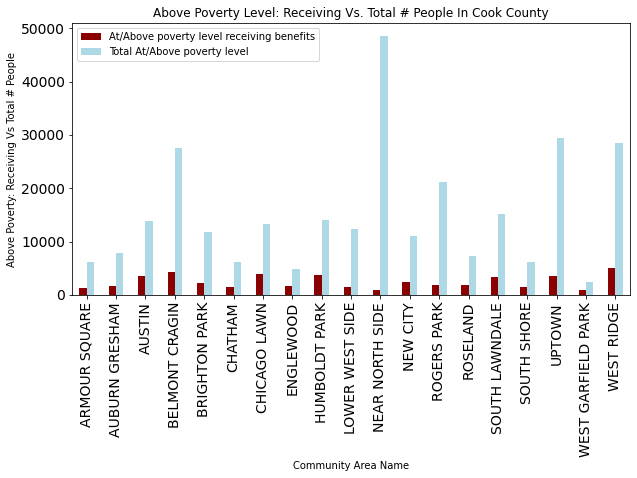

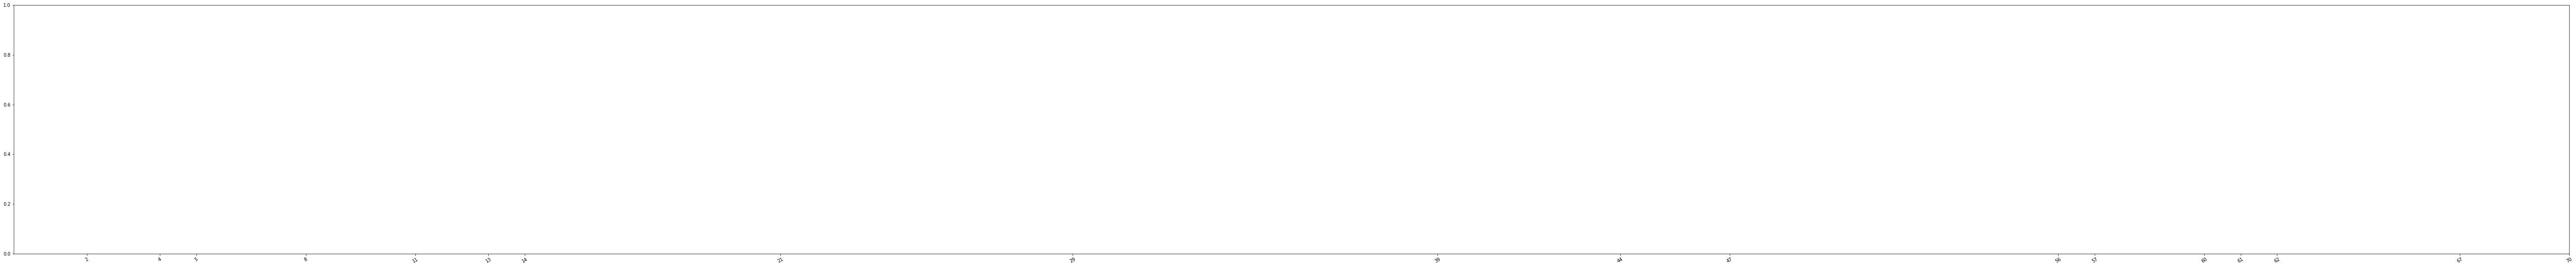

<Figure size 432x288 with 0 Axes>

In [482]:
#above pov level over 200
x_axis = "COMMUNITY AREA NAME"
y_axis = ["At/Above poverty level receiving benefits", "Total At/Above poverty level"]

a_greater_200.plot.bar(x_axis, y_axis, figsize=(10,5),fontsize = 14, align="center", color=('darkred', 'lightblue'))

plt.title("Above Poverty Level: Receiving Vs. Total # People In Cook County")
plt.xlabel("Community Area Name")
plt.ylabel("Above Poverty: Receiving Vs Total # People")

tick_val = a_greater_200.index
plt.figure(figsize = (100,10))
width = 1
plt.xticks(ticks = tick_val, rotation = 30)

plt.savefig("output_images/abovepov200.png")
plt.show()
plt.tight_layout()

In [387]:
below_pov = combo[["COMMUNITY AREA NAME","Total Below poverty level", "Below poverty level receiving"]]
below_pov

,COMMUNITY AREA NAME,Total Below poverty level,Below poverty level receiving
0,AUSTIN,252.0,174.0
1,WEST RIDGE,353.0,339.0
2,WEST RIDGE,353.0,339.0
3,NEAR WEST SIDE,55.0,0.0
4,NEAR WEST SIDE,55.0,0.0
...,...,...,...
501,WEST ENGLEWOOD,121.0,71.0
502,ASHBURN,230.0,169.0
503,AVONDALE,13.0,0.0
504,MOUNT GREENWOOD,67.0,27.0


In [328]:
below_pov["COMMUNITY AREA NAME"].value_counts()

BELMONT CRAGIN     22
SOUTH LAWNDALE     20
WEST RIDGE         18
NEAR NORTH SIDE    17
NEW CITY           16
                   ..
MONTCLARE           1
EDISON PARK         1
OHARE               1
PULLMAN             1
BEVERLY             1
Name: COMMUNITY AREA NAME, Length: 73, dtype: int64

In [399]:
group_be_pov = below_pov.groupby(["COMMUNITY AREA NAME"]).sum().reset_index()
group_be_pov

greater_200 = group_be_pov.loc[group_be_pov["Below poverty level receiving"] >= 1200, :]
greater_200

,COMMUNITY AREA NAME,Total Below poverty level,Below poverty level receiving
2,ARMOUR SQUARE,2861.0,1801.0
4,AUBURN GRESHAM,2951.0,1892.0
5,AUSTIN,5009.0,3368.0
8,BELMONT CRAGIN,4486.0,2140.0
11,BRIGHTON PARK,3301.0,1858.0
13,CHATHAM,2193.0,1382.0
14,CHICAGO LAWN,5356.0,3362.0
21,ENGLEWOOD,3263.0,2240.0
29,HUMBOLDT PARK,5736.0,3716.0
39,LOWER WEST SIDE,3318.0,1343.0


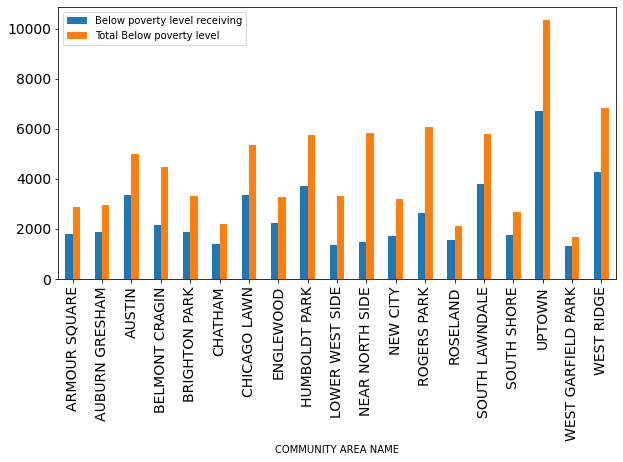

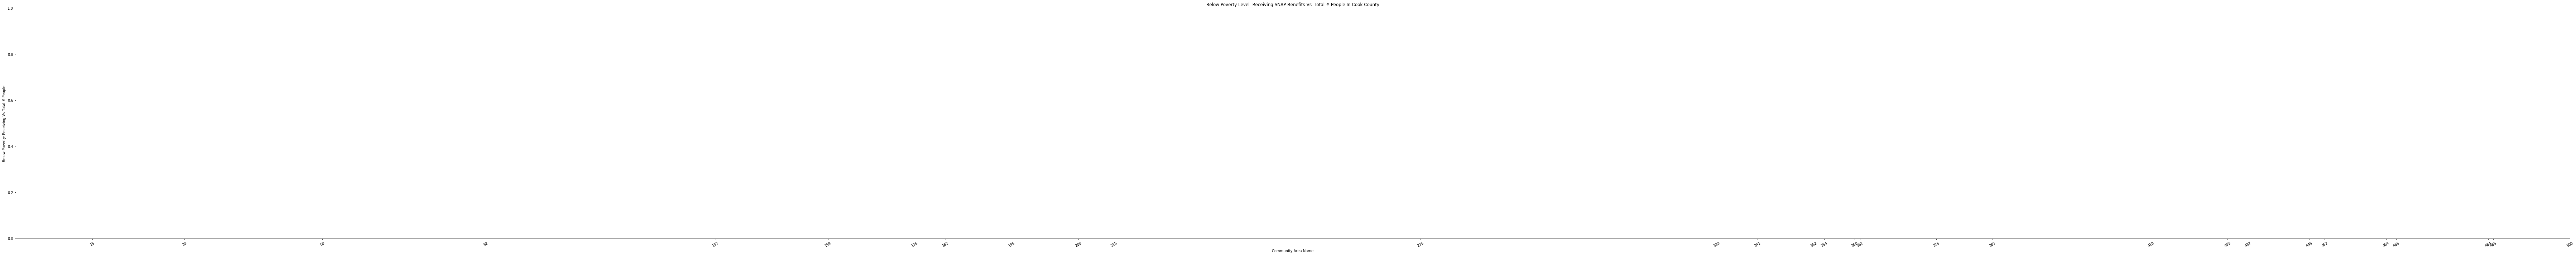

In [406]:
# x_axis = ("COMMUNITY AREA NAME")
# y_axis = ["Below poverty level receiving", "Total Below poverty level"]


# greater_200.plot.bar(x_axis, y_axis, figsize=(10,5), fontsize = 14, align="center")

# plt.figure(figsize = (100,10))

# plt.title("Below Poverty Level: Receiving SNAP Benefits Vs. Total # People In Cook County")
# plt.xlabel("Community Area Name")
# plt.ylabel("Below Poverty: Receiving Vs Total # People")

# tick_val = sample_below_pov.index

# width = .5
# plt.xticks(ticks = tick_val, rotation = 30)

# plt.tight_layout()
# plt.show()



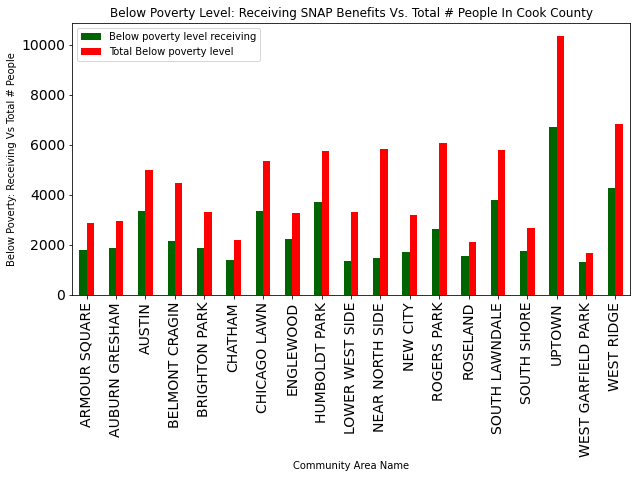

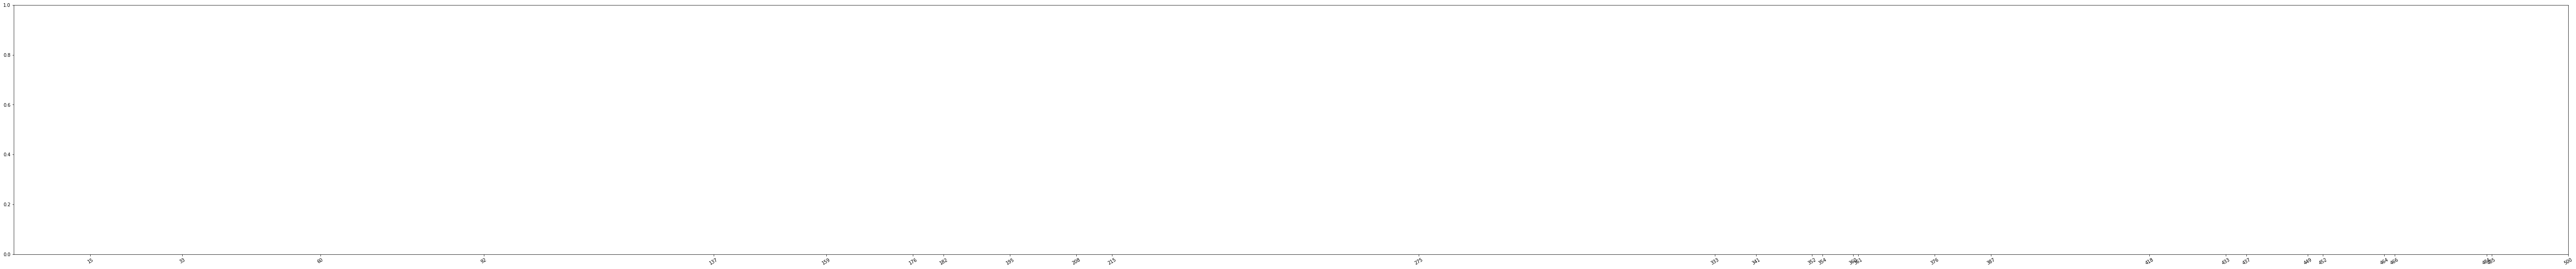

<Figure size 432x288 with 0 Axes>

In [485]:
#below pov over 200
x_axis = "COMMUNITY AREA NAME"
y_axis = ["Below poverty level receiving", "Total Below poverty level"]

greater_200.plot.bar(x_axis, y_axis, figsize=(10,5), fontsize = 14, align="center", color=('darkgreen','red'))

plt.title("Below Poverty Level: Receiving SNAP Benefits Vs. Total # People In Cook County")
plt.xlabel("Community Area Name")
plt.ylabel("Below Poverty: Receiving Vs Total # People")

tick_val = sample_below_pov.index
plt.figure(figsize = (100,10))
width = 1
plt.xticks(ticks = tick_val, rotation = 30)
plt.savefig("output_images/belowpov200.png")

plt.show()
plt.tight_layout()

In [8]:
#1 bar chart: above poverty levels Vs. grocery locations (clean_grocery.csv and Emma’s csv)